# Análisis Dimensional

In [115]:
from intervalo import *

In [116]:
a = Intervalo(-3,4)
b = Intervalo(2,3)

In [117]:
a + b

Intervalo [-1,7]

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline

Volumen característico de las células Dictyostelium Discoideum que tienen un `radio`característico de aproximadamente $10\,\mu\mbox{M}$

In [7]:
Vol_Dictyostelium = (4*np.pi/3.)*((10e-6)**3)

In [8]:
Vol_virtual = ((10e-6)**3)

In [9]:
Vol_Dictyostelium

4.188790204786391e-15

In [10]:
avogadro = (6.02214129e23)

### Fosfolípido PIP2

In [11]:
concentracion_PIP2 = (2e-6)*avogadro/(1e-3)

In [12]:
N_total_PIP2 = concentracion_PIP2*Vol_Dictyostelium

In [13]:
N_total_PIP2

5045097.289478336

In [14]:
N_total_PIP2/10000

504.50972894783365

In [15]:
concentracion_PIP2*(10e-18)

12044.282580000001

In [16]:
concentracion_PIP2*(10e-18)/10000

1.204428258

Comparamos con el valor, $500\,\mbox{nM}$, para $[\mbox{PIP2}]$ que ellos (Andrea Gamba et al.) usan... 

In [17]:
x1 = (500*(1e-9)*avogadro)/(1e-3)

In [18]:
x1*Vol_virtual/10000

30.110706450000016

### Cinasa PI3K

In [19]:
concentracion_PI3K = 50*(1e-9)*(avogadro)/(1e-3)

In [20]:
N_total_PI3K = concentracion_PI3K*Vol_Dictyostelium

In [21]:
N_total_PI3K

126127.43223695841

In [22]:
N_total_PI3K/10000

12.61274322369584

In [23]:
Kas_PIP2 = 50*(1e-6*avogadro/(1e-3))

In [25]:
Kas_PIP2

3.011070645e+22

In [26]:
Kdis_PIP2 = 0.10

In [27]:
Kcat_PI3K = 1.

In [28]:
KM_PI3K = (200e-9)*avogadro/(1e-3)

In [29]:
KM_PI3K

1.2044282579999998e+20

### Receptores

In [30]:
N_total_Rec = 3e4

In [31]:
N_total_Rec/10000

3.0

In [32]:
Kas_Rec = 50*(1e-6*avogadro/(1e-3))

In [34]:
Kas_Rec

3.011070645e+22

In [35]:
Kdis_Rec = 0.10

Andrea pone como cota superior para la concentración de receptores $50\,\mbox{nM}$, si ése fuese el caso:

In [36]:
x2 = 50*(1e-9)*avogadro/(1e-3)

In [37]:
x2*Vol_Dictyostelium/10000

12.61274322369584

Correspondería a un número de 12 receptores por `celda`

### Fosfatasa de Tesin Homóloga: PTEN

In [38]:
concentracion_PTEN = 50*(1e-9*avogadro/(1e-3))

In [39]:
N_total_PTEN = concentracion_PTEN*Vol_Dictyostelium

In [40]:
N_total_PTEN/10000

12.61274322369584

In [41]:
Kcat_PTEN = 0.5
KM_PTEN = (200e-9)*avogadro/(1e-3)

In [47]:
Kcat_PTEN

0.5

In [42]:
KM_PTEN

1.2044282579999998e+20

### Coeficiente de Difusión para PIP2 y PIP3

In [43]:
D = 1.0*(1e-12)

### Tasas

Ahora vamos a calcular las tasas; probabilidad por unidad de tiempo, que tiene asociado cada uno de los `procesos`.

R1: $\mbox{PI3K} + \mbox{Rec} \rightarrow \mbox{PI3K}\cdot\mbox{Rec}$

In [44]:
#Vcel es definido como el volumen asociado a cada una de las celdas en las que se particiono
#el volumen de la membrana celular; para ser mas precisos, el volumen de la region interna de 
#la membrana celular

Vcel = (1e-7**3)

In [45]:
Tasa_reac_1 = Vcel*Kas_Rec*(N_total_PI3K/10000)*(N_total_Rec/10000)

In [46]:
Tasa_reac_1

1139.3358262137963

...por segundo...

R2: $\mbox{PIP2} + \mbox{PTEN} \rightarrow \mbox{PIP2}\cdot\mbox{PTEN}$

In [129]:
Tasa_reac_2 = Vcel*Kas_PIP2*(20)*(N_total_PTEN/10000)

In [130]:
Tasa_reac_2

7595.572174758642

A continuación notemos los parámetros para la asociación y disociación de PIP2 y de Rec; estas son las mismas!

Sin embargo, observemos cuál es la cantidad de receptores (3-12) en comparación a la cantidad de PIP2 (20 - 504)

#### Ahora las disociaciones esperadas...

In [167]:
tasa_dis_PI3K = Kdis_Rec*12

In [168]:
tasa_dis_PI3K

1.2000000000000002

In [48]:
tasa_dis_PTEN = Kdis_PIP2*20

In [49]:
tasa_dis_PTEN

2.0

Ahora veamos la `eficiencia` de las encimas...

Supongamos que usamos las cotas máximas que pudiesen dar el valor más grande para las tasas. Para ello tomamos como si hubiese el máximo de componentes disponibles para la determinada reacción.

In [50]:
tasa_cinetica_M_PI3K = Kcat_PI3K*((12*20)/(KM_PI3K*Vcel + 20))
tasa_cinetica_M_PTEN = Kcat_PTEN*((20*20)/(KM_PTEN*Vcel + 20))

In [51]:
KM_PI3K*Vcel

0.12044282579999997

In [52]:
tasa_cinetica_M_PI3K

11.928166893635824

In [53]:
tasa_cinetica_M_PTEN

9.940139078029853

Es un poco mayor la tasa con la que se fosforilan los PIP2's $\mbox{PIP2} \rightarrow \mbox{PIP3}$, que el proceso inverso; desfosforilación $\mbox{PIP3} \rightarrow \mbox{PIP2}$.

### Difusión

Si consideramos que en una celda se formaron los 20 PIP3, estos se difundiran, de acuerdo con la ley de Fick con una tasa de...

In [54]:
tasa5 = D/(1e-7)**2

In [55]:
tasa5

100.00000000000001

Si usamos la aritmética interválica para poner cotas inferiores y superiores para estas `tasas`

In [156]:
Intervalo_tasa_difusiva = D*Intervalo(1,20)/(1e-7)**2

In [157]:
Intervalo_tasa_difusiva

Intervalo [100.0,2000.0]

### PIP2

In [160]:
Intervalo_concentracion_PIP2 = Intervalo(2e-6,30e-6)*avogadro/(1e-3)

In [161]:
Intervalo_concentracion_PIP2

Intervalo [1.204428258e+21,1.806642387e+22]

In [162]:
Intervalo_numero_total_APIP2 = Intervalo_concentracion_PIP2*Vol_Dictyostelium

In [163]:
Intervalo_numero_total_APIP2/10000

Intervalo [504.509728948,7567.64593422]

### Las siguientes tasas se estimaron simplemente utilizando directamente las concentraciones dadas en el artículo de Andrea Gamba

Como podemos apreciar estas tasas son prácticamente iguales.

In [56]:
tasa3prima = Kcat_PI3K*((12*20)/(0.02 + 20))
tasa4prima = Kcat_PTEN*((20*20)/(0.02 + 20))

In [57]:
tasa3prima

11.988011988011989

In [58]:
tasa4prima

9.990009990009991

## Análisis

La tasa con que se asocia la fosfatasa PTEN a PIP2; esto es, su reclutamiento a la parte interna de la membrana celular, es casi 7 veces mayor que la tasa con que se asocia la cinasa PI3K al receptor (PDGFR). Lo que esperamos ver en las simulaciones debido a esto es que se formen más parejas de $\mbox{PIP2}\cdot \mbox{PTEN}$ por unidad de tiempo.

La disociación de estos compuestos es proporcional al número de compuestos, por lo que esta primera fase en la que gana la asociación de PTEN eventualmente será balanceada debido a que las constantes de disociación para PTEN y para PI3K son las mismas ($0.10\,s^{-1}$)

Ahora analizemos las tasas de los procesos catalíticos:

Para el caso de PI3K tenemos una tasa de $\approx12$ moléculas por segundo, mientras que para el caso de PTEN es de $\approx10$ (un sexto menor).

##### En un escala arbitraria los órdenes de las tasas son de la siguiente manera.

$O(\mbox{PIP2} + \mbox{PTEN} \rightarrow \mbox{PIP2}\cdot \mbox{PTEN}) \approx 1000$


$O(\mbox{PI3K} + \mbox{Rec} \rightarrow \mbox{PI3K}\cdot \mbox{Rec}) \approx 1000$


$O(\mbox{PIP2} \cdot \mbox{PTEN} \rightarrow \mbox{PIP2} + \mbox{PTEN}) \approx 1$


$O(\mbox{PI3K} \cdot \mbox{Rec} \rightarrow \mbox{PI3K} + \mbox{Rec}) \approx 1$


$O(\mbox{PIP2}  \rightarrow \mbox{PIP3}) \approx 10$


$O(\mbox{PIP3}  \rightarrow \mbox{PIP2}) \approx 10$


$O[\mbox{PIP2}(i)  \rightarrow \mbox{PIP2}(j) ] \approx 100-1000$



In [172]:
import h5py

### Estados Estacionarios $a_0 = \sum a(\mu, i, j)$

In [173]:
my_file = h5py.File('Data_2015')

In [174]:
dset10 = my_file['10-a0']
dset11 = my_file['11-a0']
dset12 = my_file['12-a0']
dset13 = my_file['13-a0']
dset14 = my_file['14-a0']
dset15 = my_file['15-a0']
dset16 = my_file['16-a0']
dset17 = my_file['17-a0']
dset18 = my_file['18-a0']
dset19 = my_file['19-a0']
dset36 = my_file['36-a0']

In [175]:
%matplotlib inline

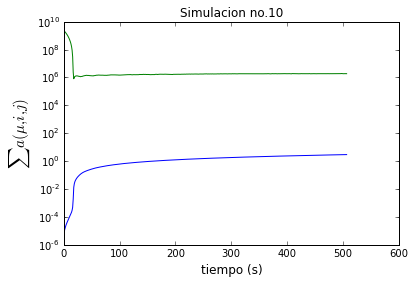

In [227]:
plt.plot(dset10[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.10')
plt.yscale('log')

In [222]:
dset10[:][50]

array([  2.67706335e-01,   1.31428808e+06])

In [237]:
dset10[:][0][0]

4.0659999999999997e-06

In [242]:
dset11[:]

array([[  3.85700000e-06,   2.48965718e+09],
       [  8.04800000e-06,   2.26557174e+09],
       [  1.25880000e-05,   2.05082295e+09],
       ..., 
       [  2.38729143e+00,   2.16883562e+06],
       [  2.39186716e+00,   2.15664694e+06],
       [  2.39647365e+00,   2.15737410e+06]])

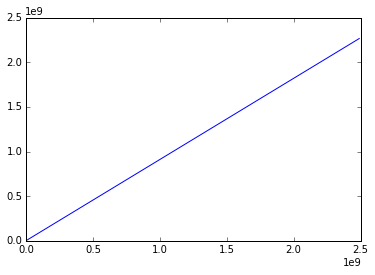

In [240]:
plt.plot(dset11[:][0],dset11[:][1])

(-100000000.0, 2500000000.0)

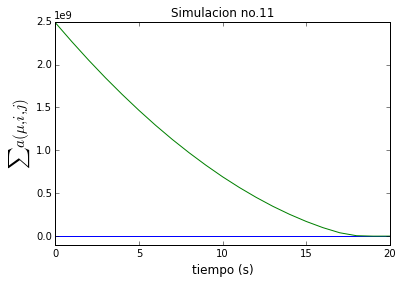

In [235]:
plt.plot(dset11[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.11')
plt.xlim(0,20)
plt.ylim(-0.1e9,2.5e9)

(0, 50)

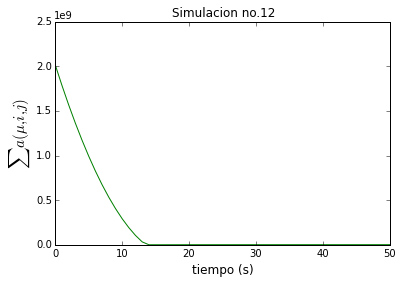

In [229]:
plt.plot(dset12[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.12')
plt.xlim(0,50)

In [223]:
dset12[:][50]

array([  2.95791864e-01,   1.56591777e+06])

(0, 50)

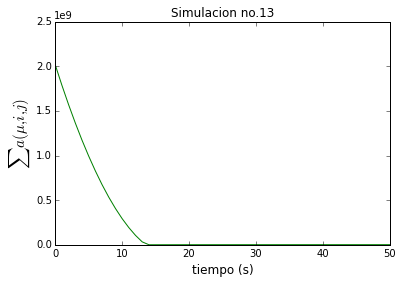

In [230]:
plt.plot(dset13[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.13')
plt.xlim(0,50)

In [224]:
dset13[:][50]

array([  2.95701623e-01,   1.47031274e+06])

(0, 50)

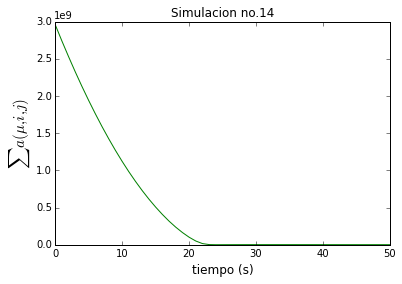

In [221]:
plt.plot(dset14[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.14')
plt.xlim(0,50)

In [216]:
dset14[:][50]

array([  1.42199591e-01,   1.56961844e+06])

En esta simulación apagamos los receptores en la iteración 50, a la cual le corresponde un tiempo de 

(0, 50)

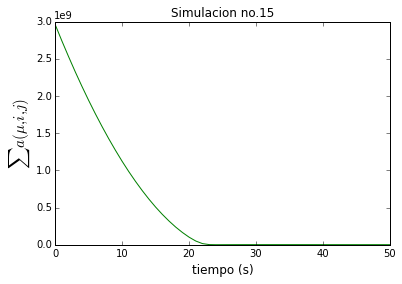

In [210]:
plt.plot(dset15[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.15')
plt.xlim(0,50)

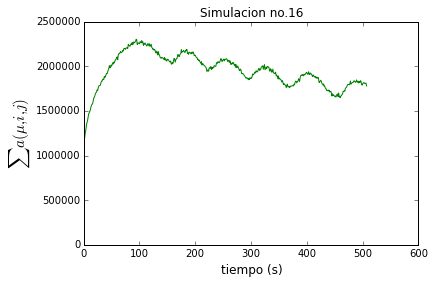

In [199]:
plt.plot(dset16[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.16')

(0, 50)

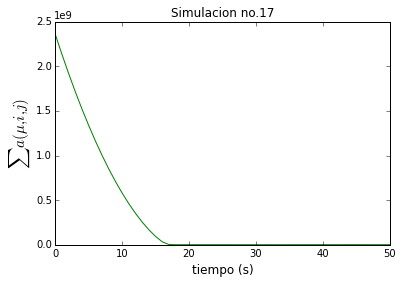

In [211]:
plt.plot(dset17[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.17')
plt.xlim(0,50)

(0, 50)

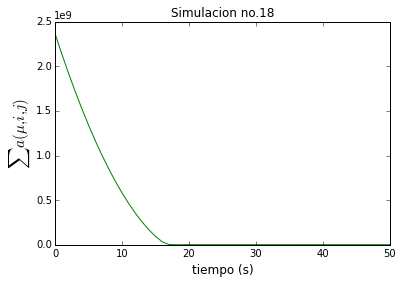

In [212]:
plt.plot(dset18[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.18')
plt.xlim(0,50)

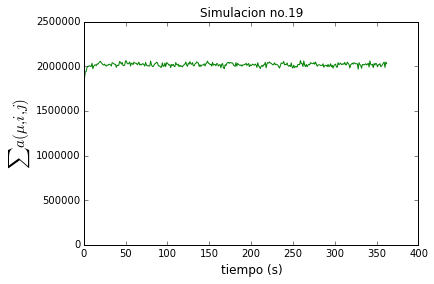

In [202]:
plt.plot(dset19[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.19')

(0, 30)

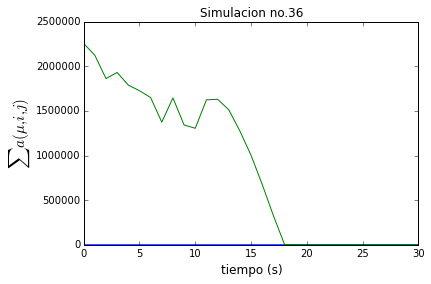

In [228]:
plt.plot(dset36[:])
plt.xlabel('tiempo (s)', fontsize = 12)
plt.ylabel('$\sum a(\mu,i,j)$', fontsize = 15)
plt.title('Simulacion no.36')
plt.xlim(0,30)